# Question 1 (30%)
Design a classifier that achieves minimum probability of error for a three-class problem where
the class priors are respectively P(L = 1) = 0.15,P(L = 2) = 0.35,P(L = 3) = 0.5 and the classconditional data distributions are all Gaussians for two-dimensional data vectors:
N ([−1
0
],[
1 −0.4
−0.4 0.5
]),N ([ 1
0
],[
0.5 0
0 0.2
]),N ([ 0
1
],[
0.1 0
0 0.1
]).
Generate 10000 samples according to this data distribution, keep track of the true class labels
for each sample. Apply your optimal classifier designed as described above to this dataset and
obtain decision labels for each sample. Report the following:
• actual number of samples that were generated from each class;
• the confusion matrix for your classifier consisting of number of samples decided as class
r ∈ {1,2,3} when their true labels were class c ∈ {1,2,3}, using r, c as row/column indices;
• the total number of samples misclassified by your classifier;
• an estimate of the probability of error your classifier will achieves, based on these samples;
• a visualization of the data as a 2-dimensional scatter plot, with true labels and decision labels
indicated using two separate visulization cues, such as marker shape and marker color;
• a clear but brief description of the results presented as described above.

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt2

#### Initializing the Data Generator function

In [2]:
def sample_data_generator(mean1, cov1, mean2, cov2, mean3, cov3, p1, p2, p3):
    np.random.seed(seed=2002)
    uniform_set = np.random.uniform(0, 1, 10000)
    prior_label = [1 if a < p1 else (2 if a < p1+p2 else 3) for a in uniform_set]
    print('1.] The number of samples generated for each class are as follows:')
    print('Label 1: {}'.format(prior_label.count(1)))
    print('Label 2: {}'.format(prior_label.count(2)))
    print('Label 3: {}'.format(prior_label.count(3)))
    data_1 = np.random.multivariate_normal(mean1, cov1, prior_label.count(1))
    data_2 = np.random.multivariate_normal(mean2, cov2, prior_label.count(2))
    data_3 = np.random.multivariate_normal(mean3, cov3, prior_label.count(3))
    return np.array(data_1), np.array(data_2), np.array(data_3)

In [3]:
# Generating data for Class Label 1:
mean1 = np.array([-1, 0])
cov1 = np.array([[1, -0.4], [-0.4, 0.5]])
p1 = 0.15

In [4]:
# Generating data for Class Label 2:
mean2 = np.array([1, 0])
cov2 = np.array([[0.5, 0], [0, 0.2]])
p2 = 0.35

In [5]:
# Generating data for Class Label 3:
mean3 = np.array([0, 1])
cov3 = np.array([[0.1, 0], [0, 0.1]])
p3 = 0.5

In [6]:
data1, data2, data3 = sample_data_generator(mean1, cov1, mean2, cov2, mean3, cov3, p1, p2, p3)

1.] The number of samples generated for each class are as follows:
Label 1: 1453
Label 2: 3498
Label 3: 5049


<IPython.core.display.Javascript object>


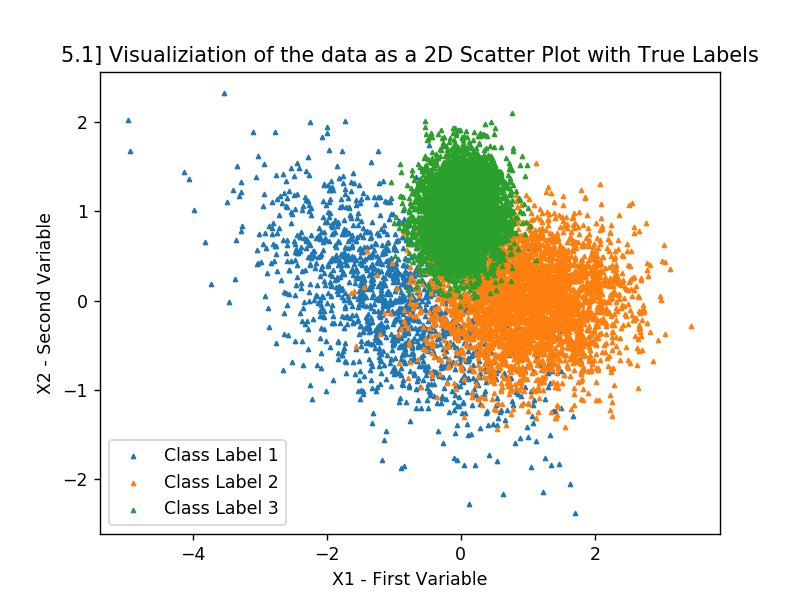

In [7]:
# Visualizing the samples generated for each class as a Scatter Plot
# Answer for the 5th Subquestion part 1
%matplotlib notebook
plt.scatter(data1[:, 0], data1[:, 1], marker='^', label='Class Label 1', s=5)
plt.scatter(data2[:, 0], data2[:, 1], marker='^', label='Class Label 2', s=5)
plt.scatter(data3[:, 0], data3[:, 1], marker='^', label='Class Label 3', s=5)
plt.xlabel('X1 - First Variable')
plt.ylabel('X2 - Second Variable')
plt.title('5.1] Visualiziation of the data as a 2D Scatter Plot with True Labels')
plt.legend()

#### Initializing the MAP Classifier
We are using the MAP classifier because it aims at achieving the minimum probability of error

In [15]:
def map_classifier(mean1, mean2, mean3, cov1, cov2, cov3, p1, p2, p3, x1, x2):
    px = []
    px.append((math.pow(2*math.pi, -1.5)*math.pow(np.linalg.det(cov1), -0.5)*math.exp((-0.5)*([x1, x2] - mean1).T.dot(np.linalg.inv(cov1)).dot([x1, x2] - mean1)))*p1)
    px.append((math.pow(2*math.pi, -1.5)*math.pow(np.linalg.det(cov2), -0.5)*math.exp((-0.5)*([x1, x2] - mean2).T.dot(np.linalg.inv(cov2)).dot([x1, x2] - mean2)))*p2)
    px.append((math.pow(2*math.pi, -1.5)*math.pow(np.linalg.det(cov2), -0.5)*math.exp((-0.5)*([x1, x2] - mean3).T.dot(np.linalg.inv(cov2)).dot([x1, x2] - mean3)))*p3)
#     print(np.argmax(px) + 1)
    return np.argmax(px) + 1

In [16]:
data1_correct = []
data1_incorrect = []
data2_correct = []
data2_incorrect = []
data3_correct = []
data3_incorrect = []
data1_incorrect2 = []
data1_incorrect3 = []
data2_incorrect1 = []
data2_incorrect3 = []
data3_incorrect1 = []
data3_incorrect2 = []
[data1_correct.append([a, b]) if map_classifier(mean1, mean2, mean3, cov1, cov2, cov3, p1, p2, p3, a, b) == 1 else data1_incorrect.append([a, b]) for a, b in data1]
[data2_correct.append([a, b]) if map_classifier(mean1, mean2, mean3, cov1, cov2, cov3, p1, p2, p3, a, b) == 2 else data2_incorrect.append([a, b]) for a, b in data2]
[data3_correct.append([a, b]) if map_classifier(mean1, mean2, mean3, cov1, cov2, cov3, p1, p2, p3, a, b) == 3 else data3_incorrect.append([a, b]) for a, b in data3]
[data1_incorrect2.append([a, b]) if map_classifier(mean1, mean2, mean3, cov1, cov2, cov3, p1, p2, p3, a, b) == 2 else data1_incorrect3.append([a, b]) for a, b in data1_incorrect]
[data2_incorrect1.append([a, b]) if map_classifier(mean1, mean2, mean3, cov1, cov2, cov3, p1, p2, p3, a, b) == 1 else data2_incorrect3.append([a, b]) for a, b in data2_incorrect]
[data3_incorrect1.append([a, b]) if map_classifier(mean1, mean2, mean3, cov1, cov2, cov3, p1, p2, p3, a, b) == 1 else data3_incorrect2.append([a, b]) for a, b in data3_incorrect]

print('Correct Classifications of Label 1: {}'.format(len(data1_correct)))
print('Incorrect Classifications of Label 1: {}'.format(len(data1_incorrect)))
print('Correct Classifications of Label 2: {}'.format(len(data2_correct)))
print('Incorrect Classifications of Label 2: {}'.format(len(data2_incorrect)))
print('Correct Classifications of Label 3: {}'.format(len(data3_correct)))
print('Incorrect Classifications of Label 3: {}'.format(len(data3_incorrect)))

Correct Classifications of Label 1: 1010
Incorrect Classifications of Label 1: 443
Correct Classifications of Label 2: 2975
Incorrect Classifications of Label 2: 523
Correct Classifications of Label 3: 4984
Incorrect Classifications of Label 3: 65


In [17]:
# Determining the Confusion Matrix
#Answer for the second sub-question
np.set_printoptions(suppress=True)
confusion_mat = np.zeros([3, 3])
confusion_mat[0][0] = len(data1_correct)
data1_incorrect_labels = [map_classifier(mean1, mean2, mean3, cov1, cov2, cov3, p1, p2, p3, a, b) for a, b in data1_incorrect]
confusion_mat[1][0] = data1_incorrect_labels.count(2)
confusion_mat[2][0] = data1_incorrect_labels.count(3)
confusion_mat[1][1] = len(data2_correct)
data2_incorrect_labels = [map_classifier(mean1, mean2, mean3, cov1, cov2, cov3, p1, p2, p3, a, b) for a, b in data2_incorrect]
confusion_mat[0][1] = data2_incorrect_labels.count(1)
confusion_mat[2][1] = data2_incorrect_labels.count(3)
confusion_mat[2][2] = len(data3_correct)
data3_incorrect_labels = [map_classifier(mean1, mean2, mean3, cov1, cov2, cov3, p1, p2, p3, a, b) for a, b in data3_incorrect]
confusion_mat[0][2] = data3_incorrect_labels.count(1)
confusion_mat[1][2] = data3_incorrect_labels.count(2)
print('2.] Following is the Confusion Matrix: \n {}'.format(confusion_mat))

2.] Following is the Confusion Matrix: 
 [[1010.  120.    2.]
 [ 221. 2975.   63.]
 [ 222.  403. 4984.]]


In the Confusion Matrix above, the columns represent the True Class Labels {1, 2, 3}, and the rows represent the Decision Class Labels {1, 2, 3}.
Therefore, all the diagonal elements of the Matrix represent the correctly classified samples, whereas the other elements represent the sample numbers that were incorrectly classified into the other class.

In [18]:
# colLabels = ['True Label 1', 'True Label 2', 'True Label 3']
# rowLabels = ['Decision Label 1', 'Decision Label 2', 'Decision Label 3']
# plt.table(cellText=confusion_mat, colLabels=colLabels, rowLabels=rowLabels, loc='center')

In [19]:
# Calculating the number of misclassified samples by the MAP classifier
total_incorrect = len(data1_incorrect) + len(data2_incorrect) + len(data3_incorrect)
print('3.] The total number of samples misclassified by the MAP classifier: {}'.format(total_incorrect))

3.] The total number of samples misclassified by the MAP classifier: 1031


In [20]:
# Calculating the Estimate of the Probability of Error for the classifier
# That would be the total number of misclassified samples divided by the total number of samples
p_error = total_incorrect/10000
print('4.] The Probability of Error for our MAP classifier is : {}'.format(p_error))

4.] The Probability of Error for our MAP classifier is : 0.1031


<IPython.core.display.Javascript object>


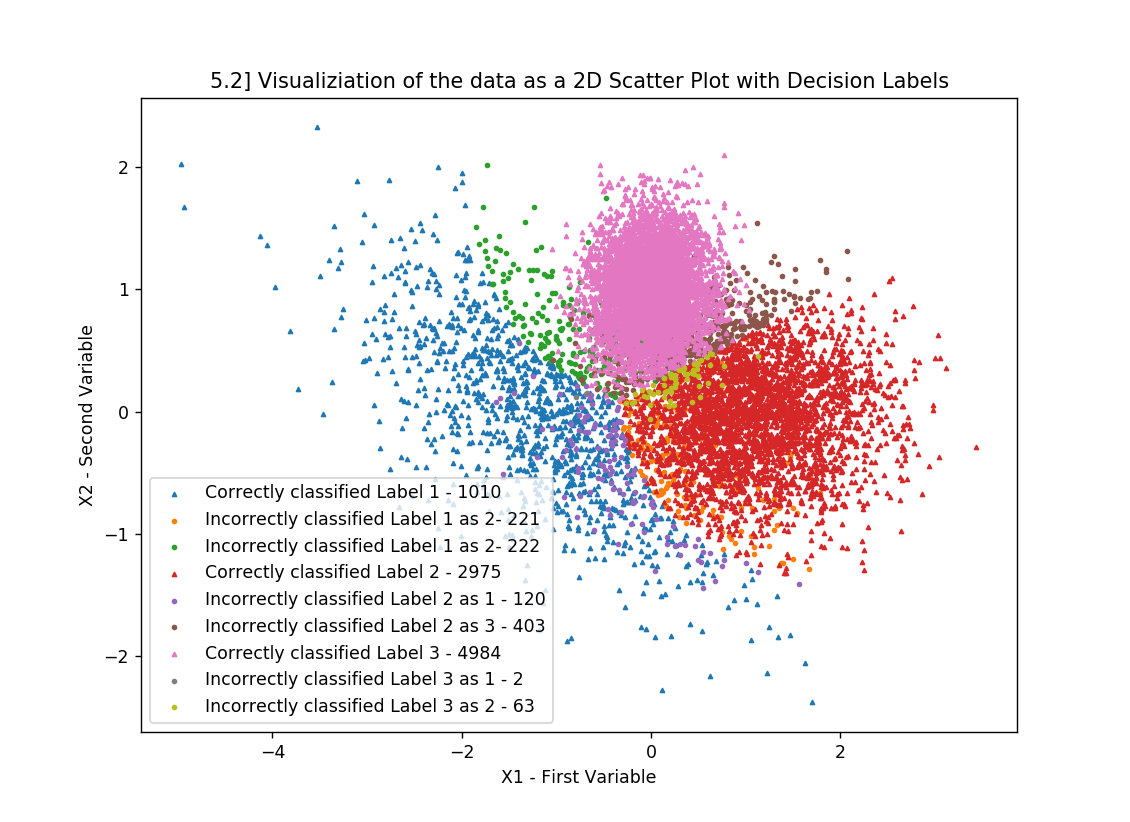

In [21]:
# Visualizing the Classified labels by the MAP classifier for each label as a Scatter Plot
# Answer for the 5th Subquestion part 2
%matplotlib notebook
plt.scatter(np.array(data1_correct)[:, 0], np.array(data1_correct)[:, 1], marker='^', label='Correctly classified Label 1 - {}'.format(len(data1_correct)), s=5)
plt.scatter(np.array(data1_incorrect2)[:, 0], np.array(data1_incorrect2)[:, 1], marker='o', label='Incorrectly classified Label 1 as 2- {}'.format(len(data1_incorrect2)), s=5)
plt.scatter(np.array(data1_incorrect3)[:, 0], np.array(data1_incorrect3)[:, 1], marker='o', label='Incorrectly classified Label 1 as 2- {}'.format(len(data1_incorrect3)), s=5)
plt.scatter(np.array(data2_correct)[:, 0], np.array(data2_correct)[:, 1], marker='^', label='Correctly classified Label 2 - {}'.format(len(data2_correct)), s=5)
plt.scatter(np.array(data2_incorrect1)[:, 0], np.array(data2_incorrect1)[:, 1], marker='o', label='Incorrectly classified Label 2 as 1 - {}'.format(len(data2_incorrect1)), s=5)
plt.scatter(np.array(data2_incorrect3)[:, 0], np.array(data2_incorrect3)[:, 1], marker='o', label='Incorrectly classified Label 2 as 3 - {}'.format(len(data2_incorrect3)), s=5)
plt.scatter(np.array(data3_correct)[:, 0], np.array(data3_correct)[:, 1], marker='^', label='Correctly classified Label 3 - {}'.format(len(data3_correct)), s=5)
plt.scatter(np.array(data3_incorrect1)[:, 0], np.array(data3_incorrect1)[:, 1], marker='o', label='Incorrectly classified Label 3 as 1 - {}'.format(len(data3_incorrect1)), s=5)
plt.scatter(np.array(data3_incorrect2)[:, 0], np.array(data3_incorrect2)[:, 1], marker='o', label='Incorrectly classified Label 3 as 2 - {}'.format(len(data3_incorrect2)), s=5)
plt.xlabel('X1 - First Variable')
plt.ylabel('X2 - Second Variable')
plt.title('5.2] Visualiziation of the data as a 2D Scatter Plot with Decision Labels')
plt.legend()

#### 6.] Description of the results gathered above
I have been presented with 3 Class Labels, each sampled at a given Gaussian.

1.] I randomly generated the data for the respective class labels as per the priors provided to me.

By using the Maximum-A-Posteriori (MAP) Classifier I found the decision labels of my classifier for each of the 10000 samples.
MAP classifier dictates that for any given sample, the maximum product of the prior with the probability that the sample is part of a given label is classified to be that Label's sample.

2.] Through the MAP Classifier I found the Confusion Matrix, which gives a comparative chart of how many samples of each class were correctly and incorrectly classified as part of another class.

3.] By adding the number of misclassified labels, I was able to determine the total number of Misclassified Labels.

4.] The ratio of the misclassified labels to the total number of samples gives us the Probability of Error for our classifier.

5.] Through two scatter plots, I have visualized the data with the True Labels and with the Decision Labels.
In the second plot you can clearly see the number of correctly classified labels in each class with the triangular markers, along with the number of misclassified labels in each class with the circular markers.